<a href="https://colab.research.google.com/github/duanzhihua/-transformer-english2chinese-/blob/main/%F0%9F%90%AB_CAMEL_%E5%88%9B%E5%BB%BA%E6%82%A8%E7%9A%84%E7%AC%AC%E4%B8%80%E4%B8%AA%E6%99%BA%E8%83%BD%E4%BD%93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 创建您的第一个智能体

## 设计哲学

`ChatAgent()` 类是 CAMEL 🐫 的基石。我们设计代理的初衷是回答以下问题：

> 我们能否设计一个自主的交流智能体，能够在最少的人类监督下引导对话，由此完成任务？

在我们当前的实现中，我们考虑了具有以下关键特性的智能体：

- **角色 Role**：结合目标和内容规范，这设置了代理的初始状态，引导代理在顺序交互过程中采取行动。

- **大型语言模型 (LLMs)**：每个代理都使用大型语言模型来增强认知能力。LLM 使代理能够理解和生成自然语言，允许代理解释指令、生成响应并参与复杂的对话。

- **记忆 Memory**：上下文记忆和外部记忆，允许代理以更扎实的方式推理和学习。

- **工具 Tools**：一组函数，供我们的代理用于与外部世界互动；本质上，这为我们的代理提供了实体化。

- **通信 Communication**：我们的框架允许代理之间灵活且可扩展的通信。这对于关键研究问题至关重要。

- **推理 Reasoning**：我们将为代理配备不同的规划和奖励（评论家）学习能力，允许它们以更有指导性的方式优化任务完成。

## 快速入门
让我们首先通过简单地使用系统消息初始化一个 `ChatAgent` 实例，并与用户消息进行交互。

### 🕹 第0步：准备工作

In [ ]:
!pip install "camel-ai[all]==0.2.14"

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 65.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 64.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (set

### 设置 API 密钥

您需要为 Qwen 和 Fish Audio 设置您的 API 密钥。

如果您没有 Qwen API 密钥，可以按照以下步骤获取：
1. 访问[阿里云模型工作室控制台](https://www.alibabacloud.com/en?_p_lc=1)并按照屏幕上的指示激活模型服务。
2. 在控制台的右上角，点击您的账户名并选择 API-KEY。
3. 在 API 密钥管理页面，点击“创建 API 密钥”按钮以生成新的密钥。

欲了解更多详情，您还可以查看 Qwen 文档：[通过调用 API 使用 Qwen](https://www.alibabacloud.com/help/en/model-studio/developer-reference/use-qwen-by-calling-api)

In [ ]:
import os
from getpass import getpass

qwen_api_key = getpass('Enter your API key: ')
os.environ["QWEN_API_KEY"] = qwen_api_key

Enter your API key: ··········


In [ ]:
import os
from getpass import getpass

fishaudio_api_key = getpass('Enter your API key: ')
os.environ["FISHAUDIO_API_KEY"] = fishaudio_api_key

Enter your API key: ··········


### 🕹 第1步：定义角色
创建一个系统消息以定义智能体的默认角色和行为。

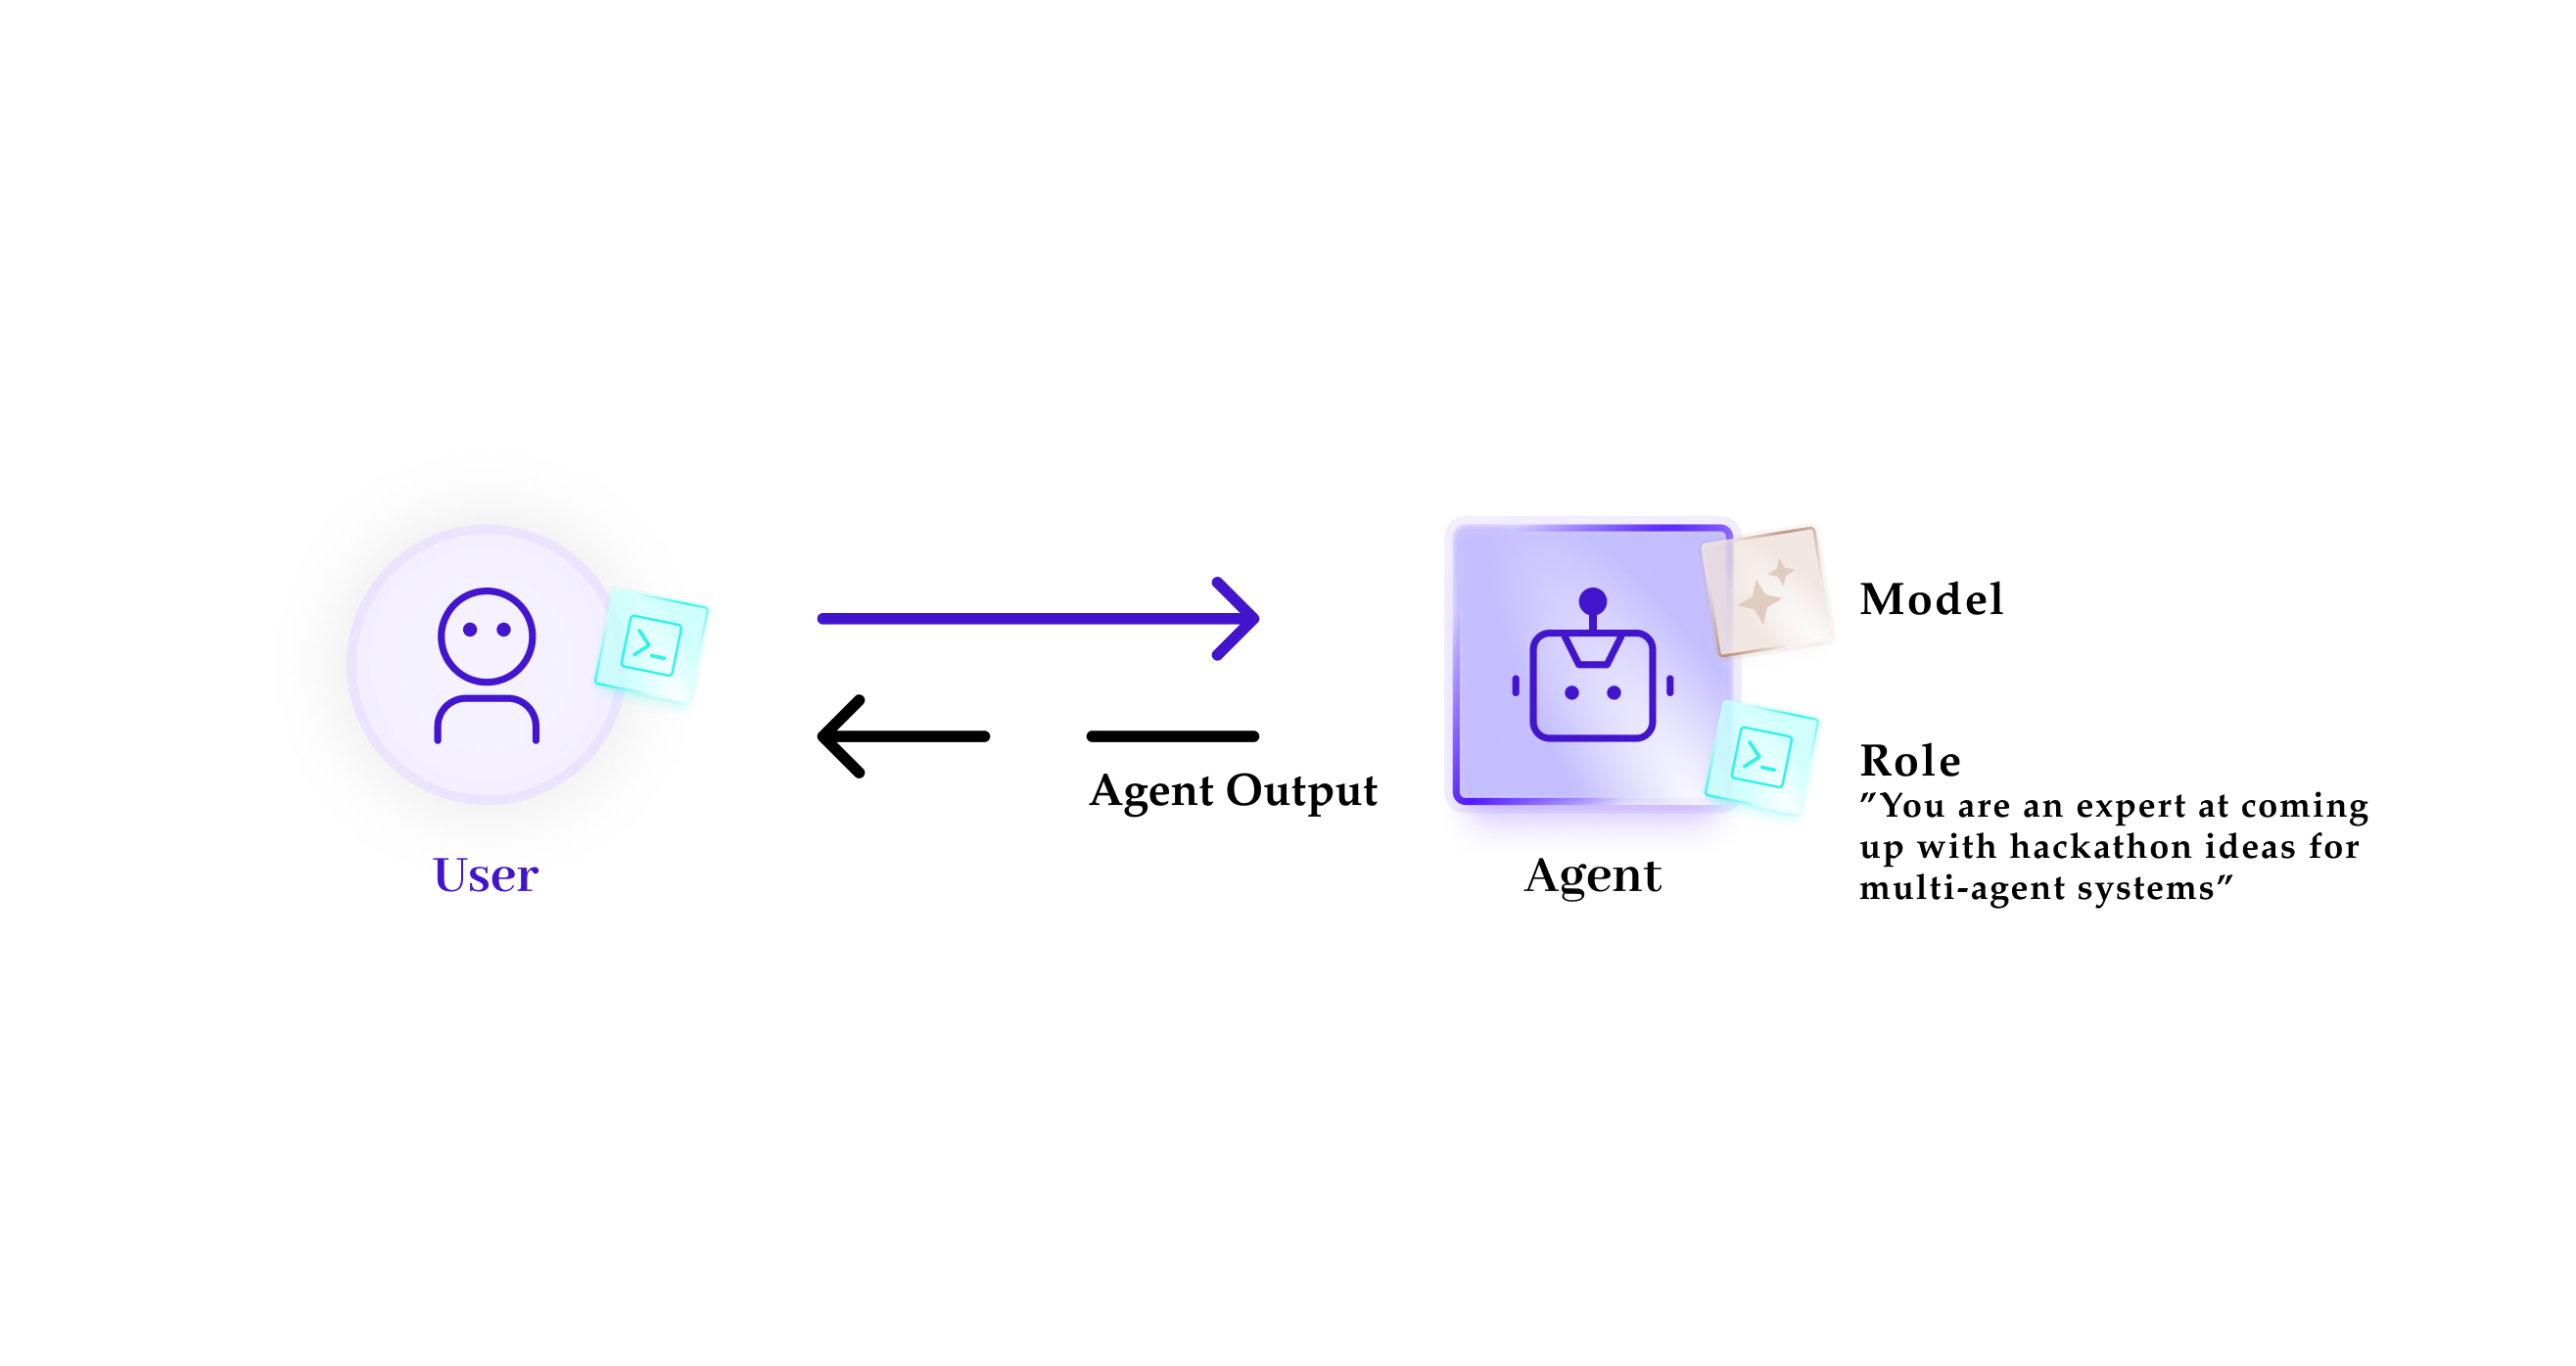

In [ ]:
sys_msg = '您是一位提出多智能体系统黑客松创意想法的专家。'

### 🕹 第2步：设置模型

使用 `ModelFactory` 来设置智能体的后端模型，欲了解更详细的模型设置，请访问我们的 [模型文档](https://docs.camel-ai.org/key_modules/models.html)。

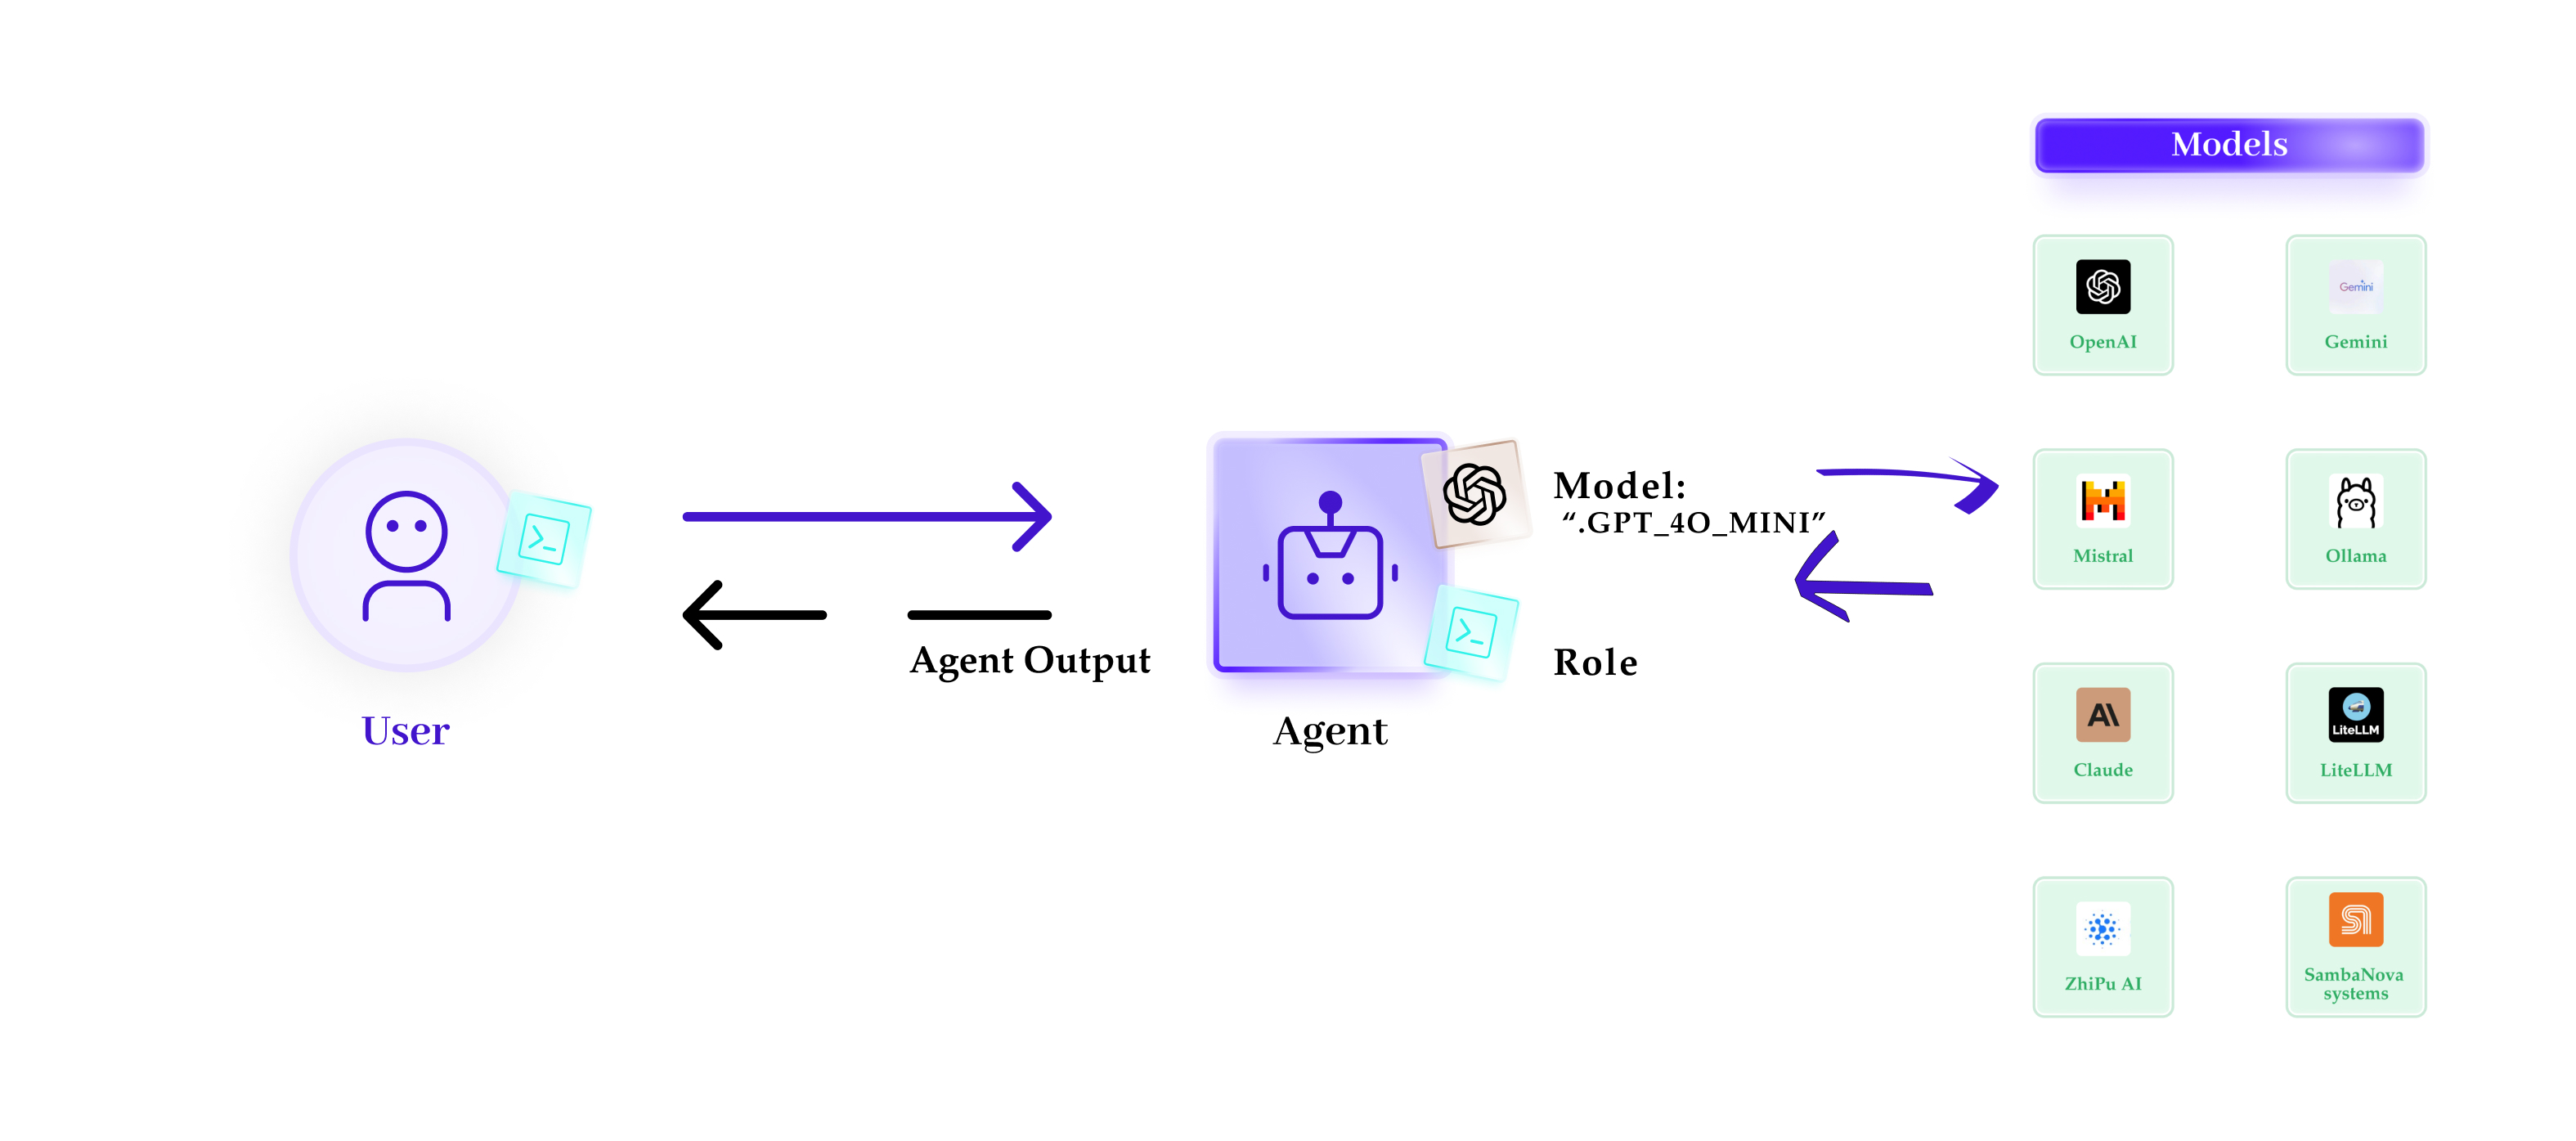

In [ ]:
from camel.configs import QwenConfig, MistralConfig
from camel.models import ModelFactory
from camel.types import ModelPlatformType, ModelType

qwen_model = ModelFactory.create(
    model_platform=ModelPlatformType.QWEN,
    model_type=ModelType.QWEN_TURBO,
    model_config_dict=QwenConfig(temperature=0.2).as_dict(),
)

设置 `ChatAgent`

In [ ]:
from camel.agents import ChatAgent

agent = ChatAgent(
    system_message=sys_msg,
    model=qwen_model,
    message_window_size=10, # [Optional] the length for chat memory
    output_language = 'Chinese' # [Optional] the output language
    )

### 🕹 第3步：使用 `.step()` 与智能体互动


In [ ]:
# Define a user message
usr_msg = '我正在参加 CAMEL-AI 黑客松，有哪些关于多智能体系统的好创意？'

# Sending the message to the agent
response = agent.step(usr_msg)

# Check the response (just for illustrative purpose)
print(response.msgs[0].content)

参加CAMEL-AI黑客松时，您可以考虑以下关于多智能体系统的创新项目创意：

1. **智能交通管理系统**：开发一个由多个智能体组成的系统，用于优化城市交通流量。这些智能体可以是模拟车辆、行人和交通信号灯的代理，它们之间通过协调来减少交通拥堵和提高道路安全性。

2. **环境监测网络**：创建一个由分布式传感器节点（智能体）组成的网络，用于实时监测空气质量、水质或土壤污染。这些智能体可以协作收集数据，并使用机器学习算法分析环境变化趋势。

3. **智能家居控制系统**：设计一套智能家居解决方案，其中包含多个智能体，如温度调节器、照明系统和安全摄像头等。这些智能体能够根据用户习惯和偏好自动调整家居设置，同时确保能源效率。

4. **虚拟经济模拟平台**：构建一个基于区块链技术的虚拟经济体，其中包含多种类型的智能体（如消费者、生产者和政府机构）。这些智能体可以进行商品交易、资源分配等活动，帮助研究经济学理论或测试新政策效果。

5. **教育辅导机器人团队**：开发一组协作式教育辅导机器人，它们可以根据学生的学习进度和风格提供个性化指导。这些机器人可以相互配合，为学生提供全面而深入的知识讲解。

6. **医疗诊断与治疗辅助系统**：建立一个由不同功能模块（智能体）组成的医疗辅助系统，包括病历管理、症状识别、药物推荐等。这些智能体可以共享信息并协同工作，以提高诊断准确性和治疗效果。

7. **灾难响应与救援协调平台**：设计一个在自然灾害发生后快速部署的多智能体系统，用于协调救援队伍、分配物资以及评估灾情。这些智能体可以实时交换信息，并根据最新情况调整行动计划。

8. **娱乐与艺术创作工具**：创造一种新型的互动式娱乐体验，让玩家通过控制不同的智能体角色来共同完成游戏任务或创作艺术品。这些智能体可以根据玩家行为做出反应，并与其他角色产生有趣互动。

选择一个您感兴趣的领域，并尝试将上述建议进一步细化，以形成具体可行的项目提案。希望这些建议能激发您的灵感！


## 高级功能



### 🔧 工具使用
想要了解更详细的工具设置，请访问我们的 [工具教程](https://docs.camel-ai.org/cookbooks/agents_with_tools.html)。


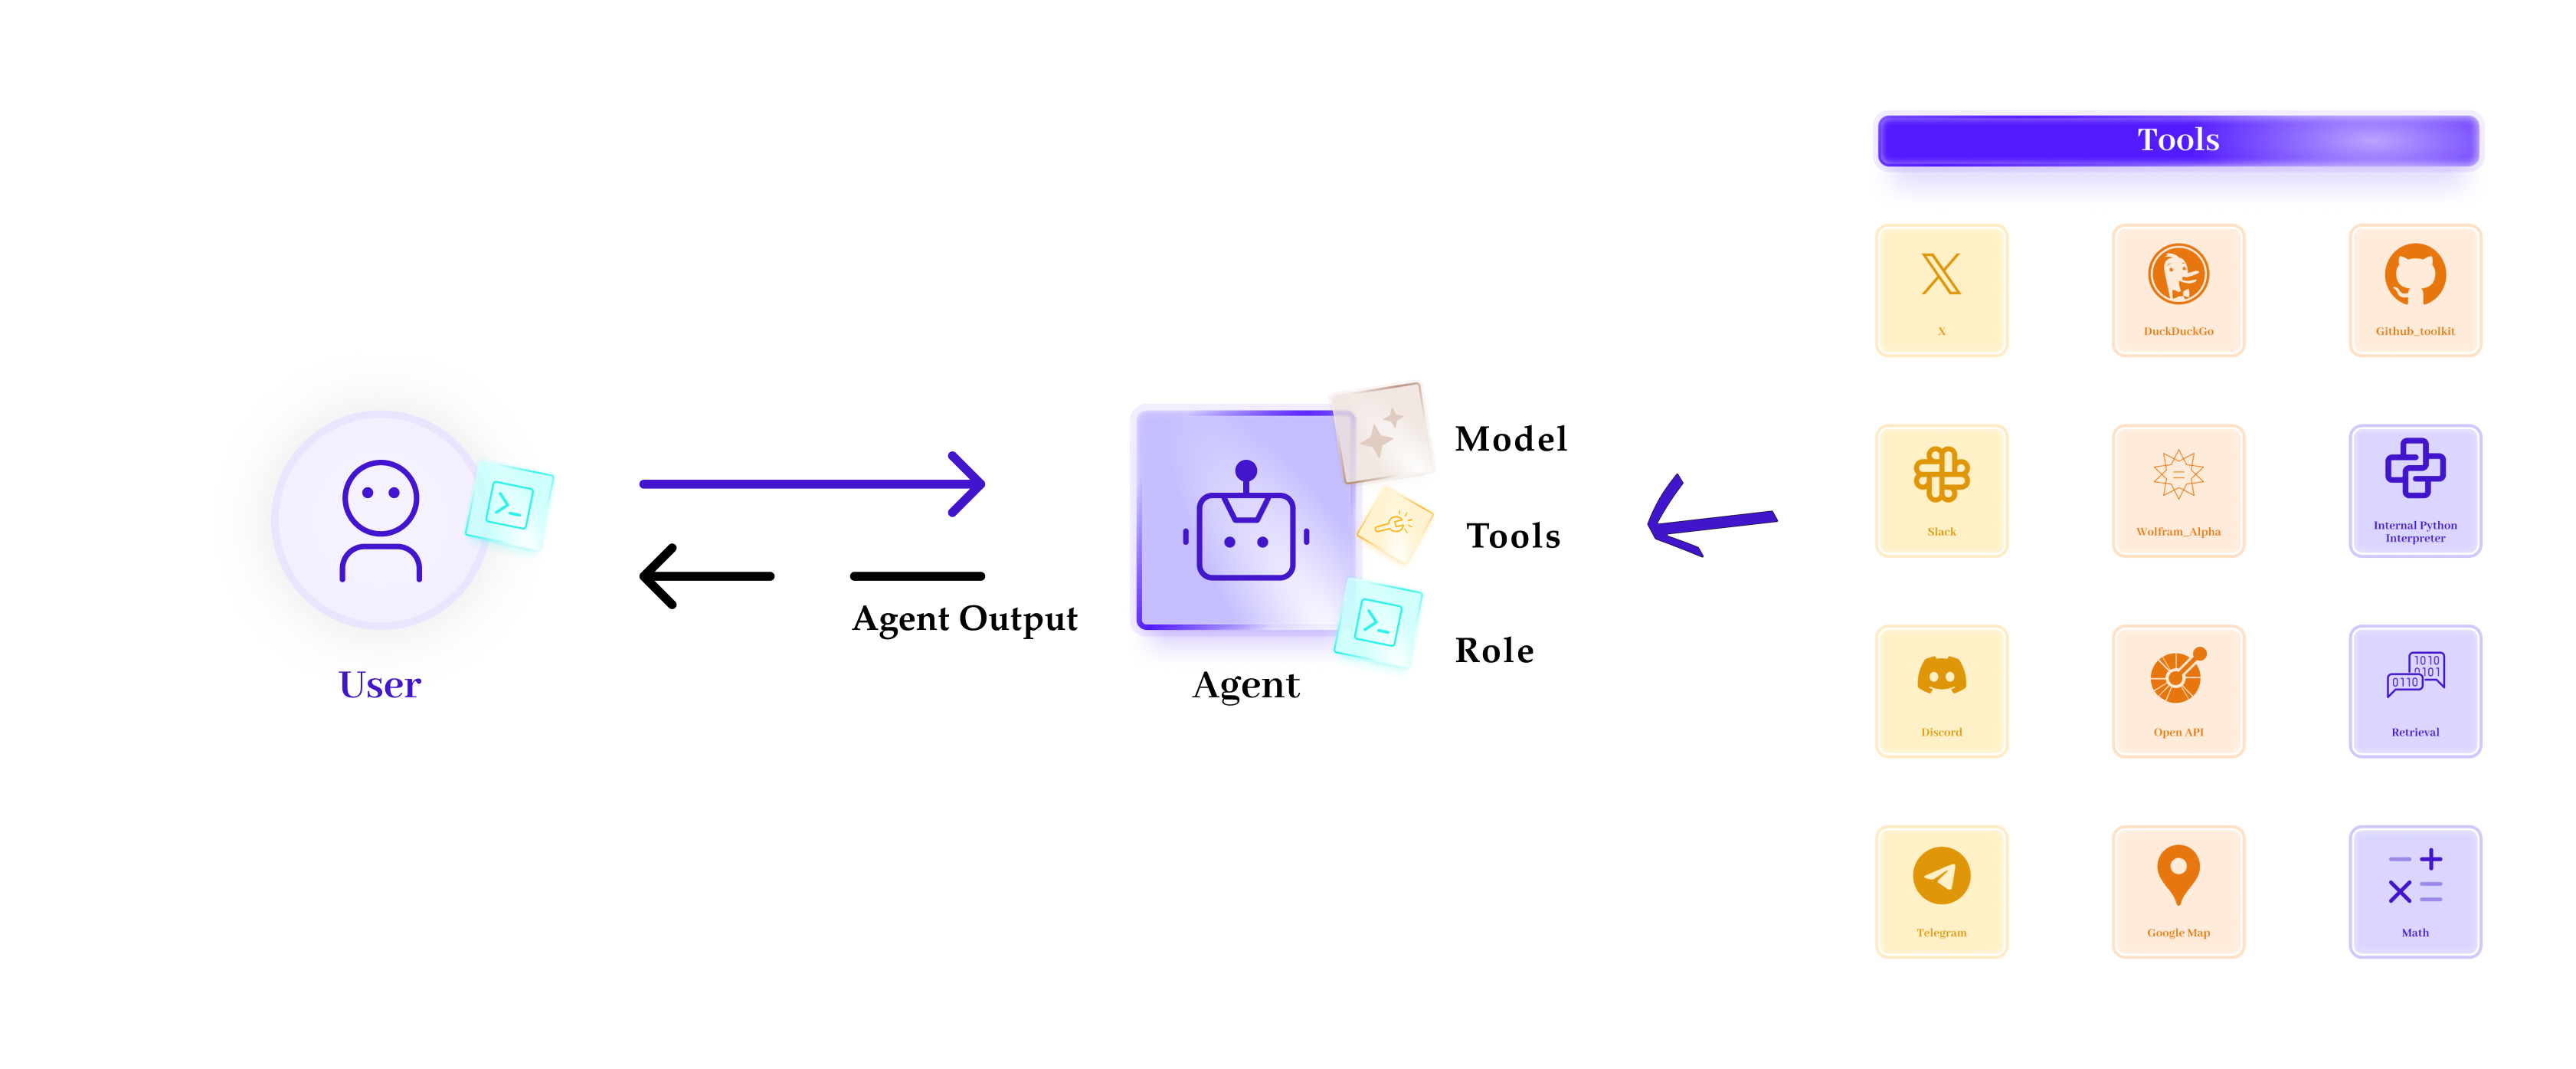

In [ ]:
# Import the necessary tools
from camel.toolkits import MathToolkit, SearchToolkit, FunctionTool

# Initialize the agent with list of tools
agent = ChatAgent(
    system_message=sys_msg,
    model = qwen_model,
    tools = [
        *MathToolkit().get_tools(),
        FunctionTool(SearchToolkit().search_duckduckgo),
    ]
    )

# Let agent step the message
response = agent.step("多智能体系统是什么？")

# Check tool calling
print(response.info['tool_calls'])

# Get response content
print(response.msgs[0].content)

[FunctionCallingRecord(func_name='search_wiki', args={'entity': 'Multi-agent_system'}, result='A multi-agent system (MAS or "self-organized system") is a computerized system composed of multiple interacting intelligent agents. Multi-agent systems can solve problems that are difficult or impossible for an individual agent or a monolithic system to solve. Intelligence may include methodic, functional, procedural approaches, algorithmic search or reinforcement learning. With advancements in Large language model (LLMs), LLM-based multi-agent systems have emerged as a new area of research, enabling more sophisticated interactions and coordination among agents.\nDespite considerable overlap, a multi-agent system is not always the same as an agent-based model (ABM).')]
多智能体系统（MAS），也被称为“自组织系统”，是由多个相互作用的智能代理组成的计算机化系统。多智能体系统可以解决单个代理或单一系统难以解决或无法解决的问题。这种智能可能包括方法学、功能、程序性方法、算法搜索或强化学习。随着大型语言模型（LLMs）的发展，基于LLM的多智能体系统已经成为一个新的研究领域，使得代理之间的交互和协调更加复杂和高效。

尽管存在相当大的重叠，但多智能体系统并不总是等同于基于代理的模型（ABM）。


### 🧠 记忆

默认情况下，我们的智能体使用 `ChatHistoryMemory` 进行初始化，允许智能体进行上下文学习，尽管受到有限窗口长度的限制。

假设您已经按照快速入门中的设置进行了配置。让我们先检查一下它的“脑”里有什么。


In [ ]:
agent.memory.get_context()

([{'role': 'system', 'content': '您是一位提出多智能体系统黑客松创意想法的专家。'},
  {'role': 'user', 'content': '多智能体系统是什么？'},
  {'role': 'assistant',
   'content': '',
   'function_call': {'name': 'search_wiki',
    'arguments': "{'entity': 'Multi-agent_system'}"}},
  {'role': 'function',
   'name': 'search_wiki',
   'content': '{\'result\': {\'A multi-agent system (MAS or "self-organized system") is a computerized system composed of multiple interacting intelligent agents. Multi-agent systems can solve problems that are difficult or impossible for an individual agent or a monolithic system to solve. Intelligence may include methodic, functional, procedural approaches, algorithmic search or reinforcement learning. With advancements in Large language model (LLMs), LLM-based multi-agent systems have emerged as a new area of research, enabling more sophisticated interactions and coordination among agents.\\nDespite considerable overlap, a multi-agent system is not always the same as an agent-based model (ABM)

您可以使用任何符合 `BaseMessage` 格式的外部提供的消息来更新/修改智能体的记忆；例如，使用一条新的用户消息：


In [ ]:
from camel.messages import BaseMessage

new_user_msg = BaseMessage.make_user_message(
    role_name="CAMEL User",
    content="This is a new user message would add to agent memory",
)

# Update the memory
agent.record_message(new_user_msg)

In [ ]:
# Check the current memory
agent.memory.get_context()

([{'role': 'system', 'content': '您是一位提出多智能体系统黑客松创意想法的专家。'},
  {'role': 'user', 'content': '多智能体系统是什么？'},
  {'role': 'assistant',
   'content': '',
   'function_call': {'name': 'search_wiki',
    'arguments': "{'entity': 'Multi-agent_system'}"}},
  {'role': 'function',
   'name': 'search_wiki',
   'content': '{\'result\': {\'A multi-agent system (MAS or "self-organized system") is a computerized system composed of multiple interacting intelligent agents. Multi-agent systems can solve problems that are difficult or impossible for an individual agent or a monolithic system to solve. Intelligence may include methodic, functional, procedural approaches, algorithmic search or reinforcement learning. With advancements in Large language model (LLMs), LLM-based multi-agent systems have emerged as a new area of research, enabling more sophisticated interactions and coordination among agents.\\nDespite considerable overlap, a multi-agent system is not always the same as an agent-based model (ABM)

您可以将智能体连接到外部数据库（作为长期记忆），智能体可以在每一步访问和检索其中的数据。欲了解更详细的记忆设置，请访问我们的 [记忆文档](https://docs.camel-ai.org/key_modules/memory.html)。


### 其他

- 将智能体设置为初始状态。

    ```python
    agent.reset()
    ```

- 设置智能体的输出语言。

    ```python
    agent.set_output_language('french')
    ```

- `ChatAgent` 类提供了几个有用的初始化选项，包括 `model_type`、`model_config`、`memory`、`message_window_size`、`token_limit`、`output_language`、`tools` 和 `response_terminators`。

请查阅 [chat_agent.py](https://github.com/camel-ai/camel/blob/master/camel/agents/chat_agent.py) 以获取详细的使用指南。


## 使用 Fish Audio 进行文本转语音

初始化 Fish Audio 集成

In [ ]:
from camel.models import FishAudioModel

audio_models = FishAudioModel()

生成新的回复并使用Fish Audio将文本回复转换成语音

In [ ]:
greeting_prompt = "今天是CAMEL-AI精通多智能体黑客松，请为前来参加的嘉宾和选手们写一段简短有趣的欢迎词。"

response = agent.step(greeting_prompt)

greetings = response.msgs[0].content
print(greetings)

# Set example local path to store the file
storage_path = "fishaudio_example/greetings.mp3"

# Convert the example input into audio and store it locally
audio_models.text_to_speech(input=greetings, storage_path=storage_path)

尊敬的各位嘉宾、参赛选手们，

欢迎大家来到CAMEL-AI多智能体系统黑客松！今天，我们聚集在这里，共同探索多智能体系统的无限可能。在这个充满挑战与机遇的舞台上，你们将有机会构建、协作、创新，让智能体们在虚拟世界里大放异彩。

多智能体系统就像是一个由无数小齿轮组成的精密机器，每一个智能体都是这台机器上不可或缺的一部分。它们彼此交流、合作，共同完成那些单打独斗难以实现的任务。在这里，你们将体验到前所未有的团队合作精神，见证智慧碰撞出的火花。

无论你是编程高手，还是刚刚接触这一领域的新人，这里都有属于你的舞台。让我们一起开启这场激动人心的旅程，用我们的智慧和创造力，书写多智能体系统的新篇章！

预祝大家在接下来的时间里灵感不断，成果丰硕！现在，让我们携手并进，向着未来出发吧！

谢谢大家！


播放语音

In [ ]:
from IPython.display import Audio

display(Audio(storage_path, autoplay=False))

## 备注

太棒了。现在您已经迈出了创建单个智能体的第一步。在下一章中，我们将探索创建不同类型的智能体以及角色扮演功能。敬请期待 🦖🐆🐘🦒🦘🦕！
